# Capstone Project

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [12]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0




# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [13]:
#Data Cleaning
df_data['SPEEDING'].fillna('N', inplace=True)
df_data['LIGHTCOND'].fillna('Unknown', inplace=True)
df_data['ROADCOND'].fillna('Unknown', inplace=True)
df_data['WEATHER'].fillna('Unknown', inplace=True)
df_data['COLLISIONTYPE'].fillna('Other', inplace=True)
df_data['UNDERINFL'].fillna('Y', inplace=True)
df_data['INATTENTIONIND'].fillna('N', inplace=True)
df_data['ADDRTYPE'].fillna('Unknown', inplace=True)
df_data.SEVERITYCODE[df_data.SEVERITYCODE == 1] = 1
df_data.SEVERITYCODE[df_data.SEVERITYCODE == 2] = 0

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
Feature = df_data[['VEHCOUNT','PERSONCOUNT']]
Feature = pd.concat([Feature,pd.get_dummies(df_data[['UNDERINFL','INATTENTIONIND','SPEEDING','LIGHTCOND','ROADCOND','WEATHER','HITPARKEDCAR','SDOT_COLDESC','JUNCTIONTYPE','COLLISIONTYPE','HITPARKEDCAR','ADDRTYPE']])], axis=1)
Feature.head()

,VEHCOUNT,PERSONCOUNT,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,INATTENTIONIND_N,INATTENTIONIND_Y,SPEEDING_N,SPEEDING_Y,...,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,HITPARKEDCAR_N,HITPARKEDCAR_Y,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown
0,2,2,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,2,2,1,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,3,4,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,3,3,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2,2,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [15]:
X = Feature
X[0:5]

,VEHCOUNT,PERSONCOUNT,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,INATTENTIONIND_N,INATTENTIONIND_Y,SPEEDING_N,SPEEDING_Y,...,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,HITPARKEDCAR_N,HITPARKEDCAR_Y,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown
0,2,2,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,2,2,1,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,3,4,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,3,3,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2,2,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
y = df_data['SEVERITYCODE'].values
y[0:5]

array([0, 1, 1, 1, 0])

In [17]:
# Normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

## Classification
We will use the following algorithm:
- Decision Tree
- Support Vector Machine
- Logistic Regression

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7386413252857327


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7596506998844228


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7496853730576603


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [LogisticRegression(random_state=1234), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


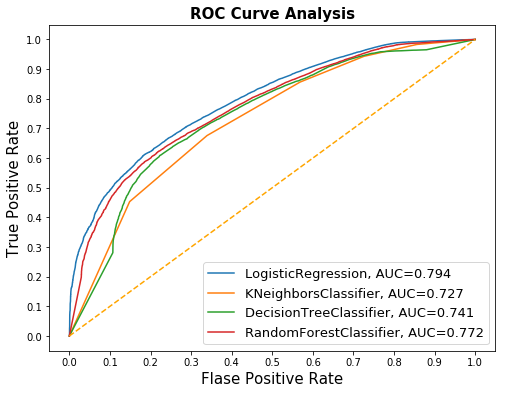

In [24]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()